<a href="https://colab.research.google.com/github/Audrey-ai/House_Price_Prediction/blob/main/Real_Estate_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Defining the Question

### a) Specification of Data Analytical Question

As a Data Scientist for Hass Consulting Company which is a real estate leader with over 25 years of experience,the task is to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. 


The final outcome of the research is to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

### b) Defining the Metric for Success

Upon studying the factors taht affect housing prices,the research will be considered a success if a model is created that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.

### c) Understanding the context 

The real estate market plays a very important role in any economy. It is known to have a
dramatic multiplier effect and is a key economic indicator. The real estate market has
experienced significant growth in the last decade w ith many countries experiencing house
price fluctuations. 


To ensure the economy is proper positioned a study into forces behind the price fluctuations and hence the market growth is paramount and some of general factors that affect the prices include: interest rates, GDP, level of money supply and Inflation rate.

### d) Recording the Experimental Design

Experimental design refers to how variables are allocated to the different conditions in a reaserch or experiment.
The experimental design used is Independent measures design, also known as between-groups,which is an experimental design where different variable recordings are used in each condition of the independent variable. 

###e) Data Relevance

The data we are using in this research is relevant to our study as some of the variables of interest known to predict the price right from nature of the house(room capacity), location, the year the property was built and the nature of the property location in terms of the square feet size.

#2. Reading and Checking of data


In [663]:
#Importing the relevant libraries to use in our reasecrh

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

In [664]:
#Loading the dataset to use in our research

df = pd.read_csv('house_data.csv')
df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [665]:
#Checking the shape of the dataset

df.shape

(21613, 20)

In [666]:
#Checking the information on our dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

#3. Data Cleaning

In [667]:
#Dropping unnecessary columns

df.drop(['id','lat','long'],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503


In [668]:
#Checking for null values

df.isnull().any()

#There are no null values in our dataset

price            False
bedrooms         False
bathrooms        False
sqft_living      False
sqft_lot         False
floors           False
waterfront       False
view             False
condition        False
grade            False
sqft_above       False
sqft_basement    False
yr_built         False
yr_renovated     False
zipcode          False
sqft_living15    False
sqft_lot15       False
dtype: bool

In [669]:
#Checking for duplicate values

df.duplicated().any()

#There are duplicate entries in our data
#Dropping duplicates

df.drop_duplicates(inplace=True)

#Checking if there are any more duplicate values after dropping
df.duplicated().any()   #There are no more duplicate values

False

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

<function matplotlib.pyplot.show>

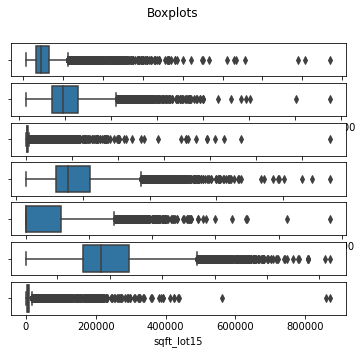

In [670]:
#Checking for outliers

Variables = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']

fig, ax = plt.subplots(len(Variables), figsize=(6,5))
fig.suptitle('Boxplots')

for i,col_val in enumerate(Variables):
    sns.boxplot(df[col_val],ax=ax[i])

plt.show

In [671]:
#Creating a year column that reflects how long it takes to renovate a built house
df['year'] = df['yr_renovated'] -df['yr_built']

#Creating an updated year column
#First creating a list of our conditions
condition = [(df['year'] < 0),
             (df['year']==0),
             (df['year']>0)]
  

# create a list of the values we want to assign for each condition
value = [0,0,df['year']]

# create a new column and use np.select to assign values to it using our lists as arguments
df['year_adj'] = np.select(condition, value)


#Cross-checking our data to see if year column has been created and updated
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15,year,year_adj
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,1340,5650,-1955,0
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,1690,7639,40,40
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,2720,8062,-1933,0
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,1360,5000,-1965,0
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,1800,7503,-1987,0


#4. Exploratory Data Analysis

#4.a)Univariate Data Analysis

In [672]:
#Creating frequency tables for a few variables

Freq= ['bedrooms','floors','condition','grade']

for variable in Freq:
 print(variable)
 print(df[variable].value_counts())

 

 #From the frequency tables below,
 # Most houses in our dataset have 3 bedrooms and have no floor divisions


bedrooms
3     9821
4     6881
2     2759
5     1600
6      272
1      199
7       38
8       13
0       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64
floors
1.0    10680
2.0     8236
1.5     1910
3.0      612
2.5      161
3.5        8
Name: floors, dtype: int64
condition
3    14026
4     5678
5     1701
2      172
1       30
Name: condition, dtype: int64
grade
7     8981
8     6065
9     2612
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


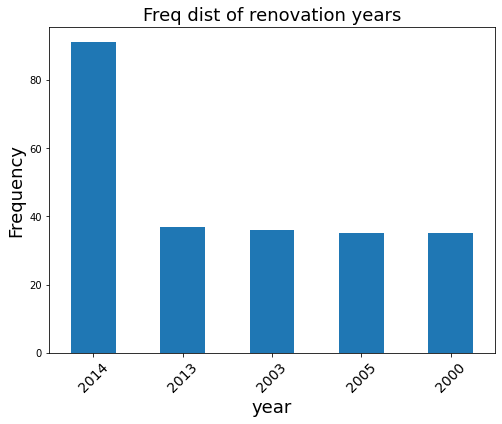

In [673]:
#Checking the top 5  years with most renovations
#
#Bar plot on the year of renovations

df['yr_renovated'][df['yr_renovated']!=0].value_counts().head(5).plot.bar(figsize=(8,6))

plt.title('Freq dist of renovation years',size=18)
plt.xlabel('year',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()



#Most houses in our dataset are yet to be renovated 
#but for those renovated,most renovations were done in 2014 and 2013

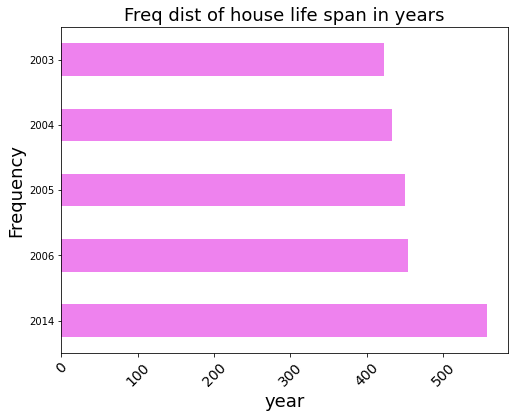

In [674]:
#Checking the top 5  years where most houses have their life span
#
#Bar plot on the building life span

df['yr_built'][df['yr_built']!=0].value_counts().head(5).plot.barh(figsize=(8,6),color='violet')

plt.title('Freq dist of house life span in years',size=18)
plt.xlabel('year',size=18)
plt.xticks(fontsize=14,rotation=45)
plt.ylabel('Frequency',size=18)
plt.show()



#Most houses have a life span of over 400 years

In [675]:
#Summary of descriptive statistics for our numerical columns
#

df[['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']].describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,sqft_living15,sqft_lot15
count,2.160700e+04,21607.000000,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.402008e+05,2079.954783,1.511019e+04,1788.397186,291.557597,1986.591799,12770.571991
std,3.674061e+05,918.526856,4.142579e+04,828.156250,442.618358,685.436161,27307.553760
min,7.500000e+04,290.000000,5.200000e+02,290.000000,0.000000,399.000000,651.000000
25%,3.217250e+05,1428.500000,5.040000e+03,1190.000000,0.000000,1490.000000,5100.000000
50%,4.500000e+05,1910.000000,7.620000e+03,1560.000000,0.000000,1840.000000,7620.000000
75%,6.450000e+05,2550.000000,1.069200e+04,2210.000000,560.000000,2360.000000,10083.500000
max,7.700000e+06,13540.000000,1.651359e+06,9410.000000,4820.000000,6210.000000,871200.000000


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Distribution on house prices')

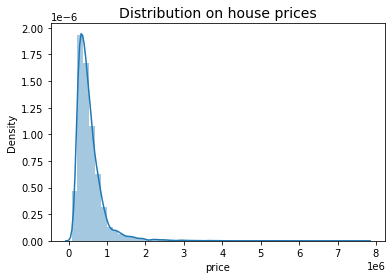

In [676]:
#Checking the distribution of price
#

sns.distplot(df['price'])
plt.title('Distribution on house prices',size=14)

#The distribution is skewed to the right

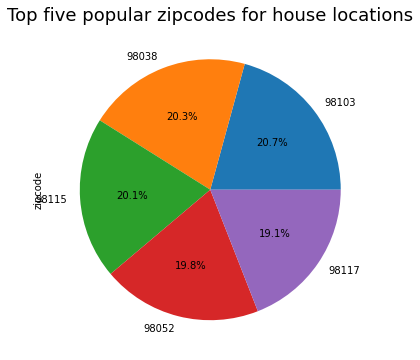

In [677]:
#Pie chart on zip code popularity
#

df['zipcode'].value_counts().head(5).plot.pie(figsize=(8,6),autopct='%1.1f%%')

plt.title('Top five popular zipcodes for house locations',size=18)
plt.show()

#Most houses zipcode is 98103

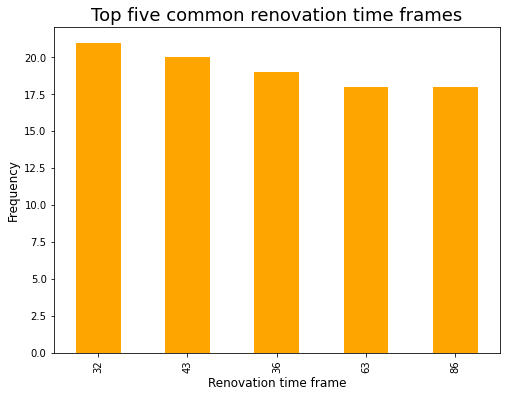

In [678]:
#Pie chart on time it takes to renovate most years
#

df['year_adj'][df['year_adj']!=0].value_counts().head(5).plot.bar(figsize=(8,6),color='orange')

plt.title('Top five common renovation time frames',size=18)
plt.xlabel('Renovation time frame',size=12)
plt.ylabel('Frequency',size=12)
plt.show()

#A majority of renovations are done 32 years later after the building of the houses

#4.b)Bivariate data analysis

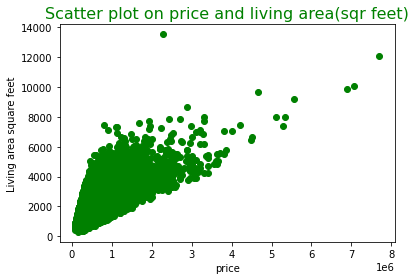

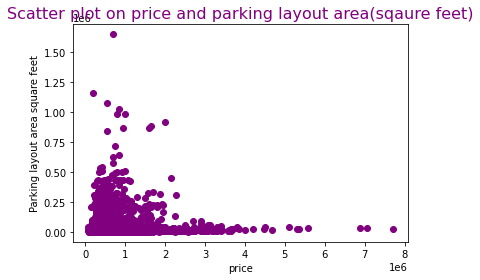

In [679]:
#Scatter plot to check the relationship between various variables

#Scatter plot to check on relation between price and living area in square feet
plt.scatter(df['price'],df['sqft_living'], color='Green')
plt.title('Scatter plot on price and living area(sqr feet)',size=16,color='Green')
plt.xlabel('price',size=10)
plt.ylabel('Living area square feet',size=10)
plt.show()

##There seems to be a positive relation between price and living area(sqr feet)


#Scatter plot to check on relation between price and square feet area of parking Layout
plt.scatter(df['price'],df['sqft_lot'], color='purple')
plt.title('Scatter plot on price and parking layout area(sqaure feet)',size=16,color='purple')
plt.xlabel('price',size=10)
plt.ylabel('Parking layout area square feet',size=10)
plt.show()

##There is no specific trend in the relationship between price and square feet area of parkng layout


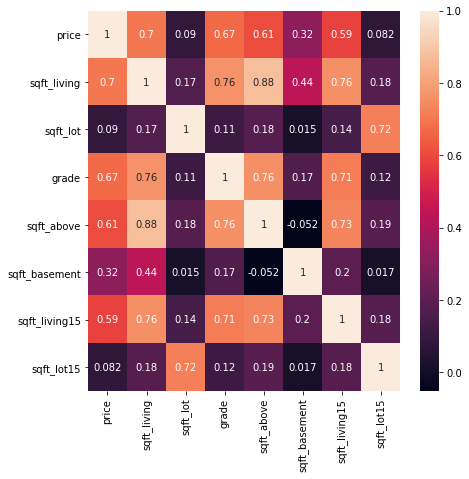

In [680]:
#Creating the correlation heatmap
#to check the relationship among number of differents variables

variables = ['price','sqft_living','sqft_lot','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15']


fig, ax = plt.subplots(figsize=(7,7))        
sns.heatmap(df[variables].corr(),annot=True,ax=ax)
plt.show()


Text(0, 0.5, 'Total price')

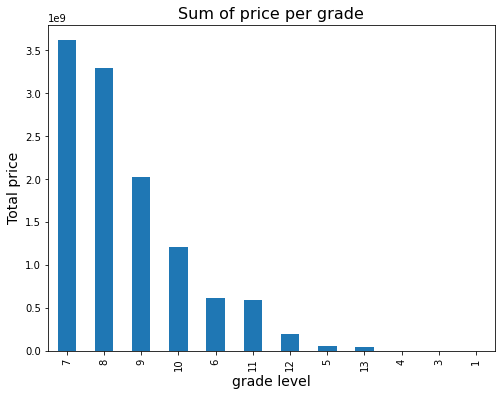

In [681]:
#Bar graph on sum of price per grade

#First grouping the dataframe by the two variables
Grade = df.groupby(['grade'])['price'].sum()

#Plotting our bar graph 
Grade.sort_values(ascending=False).plot(kind='bar',figsize=(8,6))

# labels and title
plt.title('Sum of price per grade',fontsize=16)
plt.xlabel('grade level',fontsize=14)
plt.ylabel('Total price',fontsize=14)


#Grade 7 and 8 have the highest sum of prices

In [682]:
#Bedroom categories with their sum of prices

Bed = df.groupby(['bedrooms'])['price'].sum()
Bed

#Houses with three and four bedrooms have the highest prices

bedrooms
0     5.332900e+06
1     6.321393e+07
2     1.107570e+09
3     4.579032e+09
4     4.373406e+09
5     1.259426e+09
6     2.246322e+08
7     3.615502e+07
8     1.436600e+07
9     5.363999e+06
10    2.460000e+06
11    5.200000e+05
33    6.400000e+05
Name: price, dtype: float64

Text(0, 0.5, 'Total price')

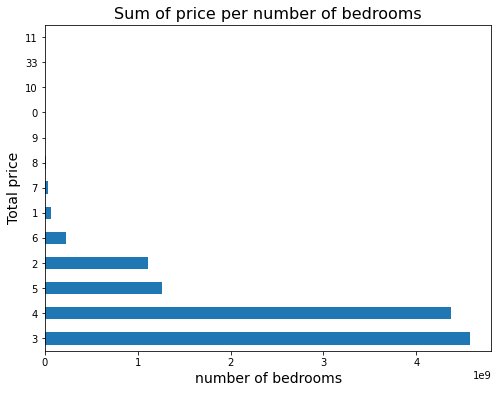

In [683]:
#Side by side graph on sum of price per number of bedrooms categories

#Plotting our bar graph 

Bed.sort_values(ascending=False).plot.barh(figsize=(8,6))

# labels and title
plt.title('Sum of price per number of bedrooms',fontsize=16)
plt.xlabel('number of bedrooms',fontsize=14)
plt.ylabel('Total price',fontsize=14)


#Houses with three and four bedrooms have the highest prices

#5. Multicollinearity

In [684]:
#Creating dataframe of variables of interest
#
Ind_variables =df[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors',
                           'waterfront','view','condition','grade','sqft_above',
                           'sqft_basement','sqft_living15','sqft_lot15','year_adj']]

# Let's display the correlations between the variables
correlations = Ind_variables.corr()

correlations

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year_adj
price,1.000000,0.308378,0.525160,0.702050,0.089641,0.256913,0.266332,0.397458,0.036361,0.667581,0.605574,0.323851,0.585371,0.082436,0.118143
bedrooms,0.308378,1.000000,0.515955,0.576673,0.031697,0.175548,-0.006584,0.079442,0.028423,0.357145,0.477568,0.303171,0.391621,0.029229,0.019228
bathrooms,0.525160,0.515955,1.000000,0.754720,0.087759,0.500745,0.063749,0.187901,-0.124929,0.665028,0.685373,0.283843,0.568703,0.087202,0.049497
sqft_living,0.702050,0.576673,0.754720,1.000000,0.172811,0.354184,0.103817,0.284630,-0.058822,0.762893,0.876595,0.435068,0.756401,0.183260,0.045254
sqft_lot,0.089641,0.031697,0.087759,0.172811,1.000000,-0.005100,0.021597,0.074740,-0.008996,0.113693,0.183515,0.015254,0.144593,0.718551,-0.002818
floors,0.256913,0.175548,0.500745,0.354184,-0.005100,1.000000,0.023735,0.029397,-0.263708,0.458071,0.524110,-0.245625,0.280098,-0.011164,0.014988
waterfront,0.266332,-0.006584,0.063749,0.103817,0.021597,0.023735,1.000000,0.401992,0.016645,0.082800,0.072078,0.080582,0.086465,0.030697,0.060948
view,0.397458,0.079442,0.187901,0.284630,0.074740,0.029397,0.401992,1.000000,0.045811,0.251431,0.167650,0.276987,0.280389,0.072561,0.083907
condition,0.036361,0.028423,-0.124929,-0.058822,-0.008996,-0.263708,0.016645,0.045811,1.000000,-0.144592,-0.158262,0.174045,-0.092929,-0.003460,-0.065064
grade,0.667581,0.357145,0.665028,0.762893,0.113693,0.458071,0.082800,0.251431,-0.144592,1.000000,0.756089,0.168494,0.713403,0.119324,0.011746


There is a mix on the degree of the relationship among our variables from negative,no to positive relationship among them.Though a majority of them have a degree of relationship among them with a number having an approximately moderate relationship among them.

Some of the variables that have a **moderate** positive relationship among them are:

1.Price and bathrooms with:square feet area of living,grade,square feet above.

2.Grade and square feet area of living and above.

The two variables that exhibit a fairly **strong** positive relationship between them(correlation of above 0.8) are square feet area of living area and above.

In [685]:
#Checking VIF scores
#
pd.DataFrame(np.linalg.inv(correlations.values), index = correlations.index, columns=correlations.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,sqft_living15,sqft_lot15,year_adj
price,2.589976,0.224623,0.088667,-1.821191e+00,-0.009264,0.012560,-0.350499,-0.308515,-0.265064,-0.843488,5.706206e-01,2.258867e-01,-0.078799,0.144274,-0.215782
bedrooms,0.224623,1.659196,-0.410789,-1.460032e+00,0.042541,0.085400,0.032700,0.082173,-0.110226,0.270782,3.220174e-01,1.575834e-01,0.010906,0.099659,-0.006797
bathrooms,0.088667,-0.410789,2.933856,-1.441842e+00,-0.007602,-0.817843,-0.013659,0.040298,0.069727,-0.497322,1.632016e-01,-2.460167e-01,0.036372,0.032472,-0.043899
sqft_living,-1.820568,-1.459669,-1.441906,2.388427e+13,-0.132795,0.990398,-0.341583,0.490752,-0.103945,0.369597,-2.153439e+13,-1.150932e+13,-1.251763,-0.092333,0.004191
sqft_lot,-0.009264,0.042541,-0.007602,-1.326809e-01,2.087793,0.077956,0.029933,-0.053494,0.014053,0.001922,-1.161663e-01,3.978244e-02,0.129259,-1.473805,0.007887
floors,0.012560,0.085400,-0.817843,9.915867e-01,0.077956,1.886671,-0.007838,-0.032853,0.200602,-0.390252,-1.283003e+00,1.385048e-01,0.337231,0.085869,-0.007785
waterfront,-0.350499,0.032700,-0.013659,-3.416372e-01,0.029933,-0.007838,1.247859,-0.452230,0.027993,0.159975,3.434248e-01,2.514970e-01,0.069032,-0.037960,-0.002465
view,-0.308515,0.082173,0.040298,4.902377e-01,-0.053494,-0.032853,-0.452230,1.420102,-0.022840,-0.042760,-3.049984e-01,-4.662674e-01,-0.242589,-0.005015,-0.047212
condition,-0.265064,-0.110226,0.069727,-1.034316e-01,0.014053,0.200602,0.027993,-0.022840,1.138226,0.161523,1.553219e-01,-4.256614e-02,0.075060,-0.027067,0.107358
grade,-0.843488,0.270782,-0.497322,3.726295e-01,0.001922,-0.390252,0.159975,-0.042760,0.161523,3.430866,-1.399634e+00,-4.483665e-01,-0.830028,0.052225,0.103512


Checking through the VIF scores of our parameters, most are between 1 and 5 thus indicating most variables are moderately correlated.

#6. Building the Model

#6.a)Multiple Linear Regression Model

In [686]:
#Standardizing and normalising  the price column

from sklearn.preprocessing import StandardScaler

price_scaled = StandardScaler().fit_transform(df['price'][:,np.newaxis]);
low_range = price_scaled[price_scaled[:,0].argsort()][:10]
high_range= price_scaled[price_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

#applying log transformation
df['price'] = np.log(df['price'])

#transformed histogram and normal probability plot
from scipy.stats import norm
from scipy import stats

df['sqft_living'] = np.log(df['sqft_living'])


outer range (low) of the distribution:
[[-1.26620527]
 [-1.25803973]
 [-1.25259603]
 [-1.24987418]
 [-1.24715234]
 [-1.24579141]
 [-1.24443049]
 [-1.24170864]
 [-1.2389868 ]
 [-1.2389868 ]]

outer range (high) of the distribution:
[[10.75074908]
 [10.77796755]
 [11.24068153]
 [12.43829419]
 [12.95544512]
 [13.09153746]
 [13.6903438 ]
 [17.28318179]
 [17.74589577]
 [19.48787783]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """


In [687]:
# Dividing the data into attributes and labels
#

X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','year_adj']]
y = df['price']


In [688]:
# Dividing our data into training and test sets
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [689]:
#Training the algorithm
# 

from sklearn.linear_model import LinearRegression
Regressor = LinearRegression()
Regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [690]:
#Checking the coefficients our regression model has chosen
# 
coeff_df = pd.DataFrame(Regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-1.571160e-02
bathrooms,-1.808328e-02
sqft_living,8.571470e-02
sqft_lot,3.158421e-07
floors,7.278297e-02
waterfront,3.750675e-01
view,5.883032e-02
condition,1.019697e-01
grade,1.788828e-01
sqft_above,9.716193e-05


In [691]:
# Making Predictions
# 

y_pred = Regressor.predict(X_test)
y_pred


array([12.54257207, 12.89946081, 14.77763951, ..., 12.96308113,
       13.25124872, 12.81760106])

In [692]:
#Checking the model accuracy
#

Regressor.score(X_test, y_test)

#Our model has an accuraccy of 61.97%

0.6196625010889312

In [693]:
# Evaluating the Algorithm
# 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

print('*****************')
print('Mean price:',df['price'].mean())


#Based on an RMSE of 0.3259 which is less than 10% of the mean price of houses thus the model 
#is quite good in performance  

Mean Absolute Error: 0.2628751689722092
Mean Squared Error: 0.10622276032405337
Root Mean Squared Error: 0.32591833382621077
*****************
Mean price: 13.04789175384592


For the multiple linear regression model,the model accuracy is 61.97% whch shows a fair level of accuracy and the RMSE is 0.3259 which is less than 10% of the mean price of houses thus indicates the model created is fairly good.

Lets check how the model accuracy changes with regards to lasso,ridge and Elastic Net regression.

# Residual and heteroscedasticity predictions by multiple linear regression

#Residual plot

In [694]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(y_pred,y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals)
print('********************')
residuals.mean()

#Our mean residual is close to 0 as shown below, indicating that our model tends to be appropriate


9791     0.257226
10281   -0.119762
19858   -0.031123
20058    0.011284
21203   -0.149051
           ...   
17762   -0.192413
13212   -0.014679
8109    -0.031449
19726   -0.513987
16123   -0.036883
Name: price, Length: 4322, dtype: float64
********************


-0.008834638763169995

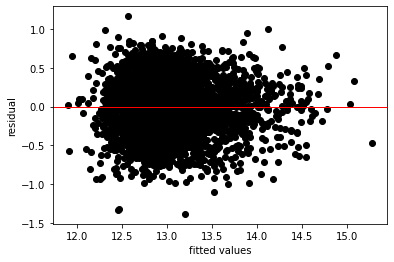

In [695]:
#Residual Plot
import matplotlib.pyplot as plt

plt.scatter(y_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()



#This does not look too bad: our residuals are somehow centered around 
#a mean that is very close to 0 though there are outliers but there are no obvious patterns

#Barlett's test for heteroscedasticity

In [696]:
#Heteroscedasticity test

import scipy as sp

test_result, p_value = sp.stats.bartlett(y_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(y_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

  

#There are no patterns in the variance of the data

inf
the variances are homogeneous!


#6.b) Quantile regression

In [697]:
#The two major variables am going to consider is price and square feet area of living area
#specifying the dependent and independent variable

x = df['price'].values.reshape(-1,1)
y = df['sqft_living'].values

In [698]:
## Let's now try to fit a linear regression model
# 
Reg = LinearRegression()
Reg.fit(x, y)

y_pred = Reg.predict(x)

print
print("Mean squared error: {0:.2f}"
      .format(np.mean((y_pred - y) ** 2)))
print('Variance score: {0:.2f}'.format(Reg.score(x,y)))

# With a low variance score of 0.46, it means that our linear regression 
# did not do a good job

Mean squared error: 0.10
Variance score: 0.46


Text(0.5, 1.0, 'Linear regression on data with non-constant variance')

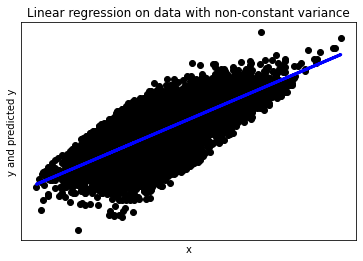

In [699]:
# We can also see this by plotting the regression below
#
plt.figure(4)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue',
         linewidth=3)

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Linear regression on data with non-constant variance")

# We will get to observe that our line of best fit is not so far from perfect but not so good looking

In [700]:
#Checking the model at 0.5th quantile

#We will use the python package statsmodels for Quantile Regression
#To check the model at 0.5th quantile
#

import statsmodels.formula.api as smf

# Finding the regression coefficients for the conditioned median, 0.5 quantile
#
mod = smf.quantreg('y ~ x', df)
res = mod.fit(q=.5)

# Then print out the summary of our model
#
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.2660
Model:                       QuantReg   Bandwidth:                     0.05623
Method:                 Least Squares   Sparsity:                       0.8096
Date:                Fri, 16 Apr 2021   No. Observations:                21607
Time:                        12:32:15   Df Residuals:                    21605
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5348      0.068      7.836      0.000       0.401       0.669
x              0.5395      0.005    103.206      0.000       0.529       0.550


In [701]:
## Similarly we can do the models for other quantiles
# 
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# We build models for each quantile in our list quantiles inside a for loop
# As we build these models we also store the model parameters in a list called params. 
for qt in quantiles: 
	res = mod.fit(q = qt )
	models.append(res)
	params.append([qt, res.params['Intercept'], res.params['x']] + res.conf_int().loc['x'].tolist())

# Lastly we make a dataframe of the same name, so we we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'x_coef', 'cf_lower_bound', 'cf_upper_bound'])
print(params)


    qt  intercept    x_coef  cf_lower_bound  cf_upper_bound
0  0.1  -0.499238  0.584957        0.571940        0.597974
1  0.2  -0.137408  0.569303        0.558208        0.580397
2  0.3   0.054337  0.562636        0.551479        0.573793
3  0.4   0.308430  0.550603        0.539881        0.561325
4  0.5   0.534839  0.539463        0.529217        0.549708
5  0.6   0.701579  0.532773        0.523086        0.542460
6  0.7   0.888765  0.524675        0.515174        0.534175
7  0.8   1.039308  0.519739        0.510492        0.528986
8  0.9   1.280984  0.509719        0.500040        0.519398


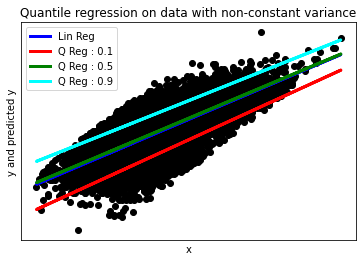

In [702]:
## Let us now plot 0.1th, 0.5th and 0.9th quantile models against our original data.
# 
plt.figure(5)
plt.scatter(x, y,  color='black')
plt.plot(x, y_pred, color='blue',
         linewidth=3, label='Lin Reg')

y_pred3 = models[0].params['Intercept'] + models[0].params['x'] * x
plt.plot(x, y_pred3, color='red',
         linewidth=3, label='Q Reg : 0.1')

y_pred4 = models[4].params['Intercept'] + models[4].params['x'] * x
plt.plot(x, y_pred4, color='green',
         linewidth=3, label='Q Reg : 0.5')


y_pred5 = models[8].params['Intercept'] + models[8].params['x'] * x
plt.plot(x, y_pred5, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

plt.xticks(())
plt.yticks(())
plt.xlabel("x")
plt.ylabel("y and predicted y")
plt.title("Quantile regression on data with non-constant variance")
plt.legend()

# Linear regression is plotted with the blue colored line. 
# We can compare that model with other quantile models.
#though we cannot be confident from the plot the quantile plots capture exact situation on data points

<Figure size 432x288 with 0 Axes>

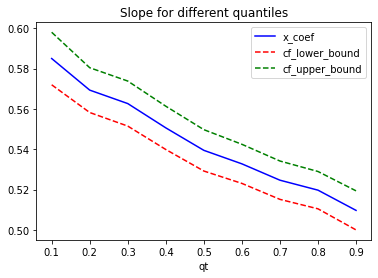

In [703]:
## Plot the changes in the quantile coefficients
# 
plt.figure(6)
params.plot(x = 'qt', y = ['x_coef','cf_lower_bound', 'cf_upper_bound'], 
	title = 'Slope for different quantiles', kind ='line', style = ['b-','r--','g--'])
  
plt.show()

# We would be able to see how the slope value varies for different quantiles. 
# Compared with linear regression which is flat across all the quantiles, 
# Quantile Regression allows us to investigate into the different areas of the data 
# and model them appropriately 

Compared with linear regression which is flat across all the quantiles, 
Quantile Regression allows us to investigate into the different areas of the data and model them appropriately 

#6.c) Ridge Regression

In [704]:
#Importing relevant libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

In [705]:
# Data Preparation
# Setting up our X and y datasets
#

X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','year_adj']]
y = df['price']



In [706]:
# Dividing our data into training and test sets
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [707]:
#Determining the most appropriate value for the l2 regularization. 

ridge = Ridge(normalize=True) 
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [708]:
# We now use the fit function to run the model and then use the best_params_ and
#best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
search.best_params_
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 0.001. 


0.10871622529138106

In [709]:
#Training the algorithm
# 

ridgeReg= Ridge(alpha=0.001,normalize=True)
ridgeReg.fit(X_train, y_train)

Ridge(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=True, random_state=None, solver='auto', tol=0.001)

In [710]:
#Checking the coefficients our regression model has chosen
# 
coeff_df = pd.DataFrame(ridgeReg.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-1.573997e-02
bathrooms,-1.772328e-02
sqft_living,8.774181e-02
sqft_lot,3.145672e-07
floors,7.261568e-02
waterfront,3.749239e-01
view,5.891525e-02
condition,1.018118e-01
grade,1.784885e-01
sqft_above,9.631837e-05


In [711]:
# Making Predictions
# 

Ridge_pred = ridgeReg.predict(X_test)
Ridge_pred


array([12.54260228, 12.90011264, 14.77532506, ..., 12.96343074,
       13.25185984, 12.81716242])

In [712]:
#Checking the model accuracy
#

ridgeReg.score(X_test, y_test)

#Our model has an accuraccy of 61.96% which is slightly same as compared to 
#that of Multiple Linear regression of 61.97%

0.6196338139137463

In [713]:
# Evaluating the Algorithm
# 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Ridge_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Ridge_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Ridge_pred)))

print('*****************')
print('Mean price:',df['price'].mean())


#Based on an RMSE of 0.3259 which is less than 10% of the mean price of houses thus the model 
#is quite good in performance 
#however it is slightly higher than of Multiple linear regression 

Mean Absolute Error: 0.26288533610401077
Mean Squared Error: 0.10623077223700639
Root Mean Squared Error: 0.32593062488358837
*****************
Mean price: 13.04789175384592


For the ridge regression model,the model accuracy is 61.96% which shows a fair level of accuracy and the RMSE is 0.3259 which is less than 10% of the mean price of houses thus indicates the model created is fairly good.

When comparing with the multiple linear regression model,there isn't a major difference in the accuracy levels and we notice a very slight difference in the accuracy with multiple linear regression model showing a better performance.

# Residual and heteroscedasticity predictions by Ridge Regression

#Residual plot

In [714]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(Ridge_pred,y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals)
print('********************')
residuals.mean()

#Our mean residual is close to 0 as shown below, indicating that our model tends to be appropriate


9791     0.257256
10281   -0.119110
19858   -0.033437
20058    0.011401
21203   -0.149334
           ...   
17762   -0.192574
13212   -0.014926
8109    -0.031099
19726   -0.513376
16123   -0.037322
Name: price, Length: 4322, dtype: float64
********************


-0.00883287726387422

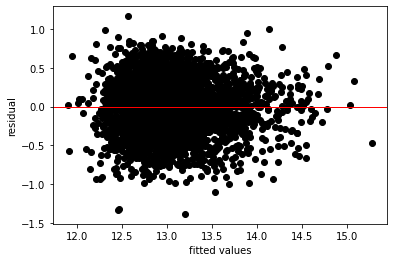

In [715]:
#Residual Plot
import matplotlib.pyplot as plt

plt.scatter(Ridge_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#This does not look too bad: our residuals are somehow centered around 
#a mean that is very close to 0 though there are outliers but there are no obvious patterns
#Since there is no major difference between multiple and ridge models,the residual plot is almost exact same

#Barlett's test for heteroscedasticity

In [716]:
#Heteroscedasticity test

import scipy as sp

test_result, p_value = sp.stats.bartlett(Ridge_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(Ridge_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

#There are no patterns in the variance of the data

inf
the variances are homogeneous!


#6.d) Lasso Regression

In [717]:
#Importing relevant libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

In [718]:
# Data Preparation
# Setting up our X and y datasets
#

X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','year_adj']]
y = df['price']

# Scaling data 
#
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [719]:
# Dividing our data into training and test sets
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [720]:
#Determining the most appropriate value for the l1 regularization. 

#lasso = Lasso() 
#gridlasso = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10,scoring ='r2')
#gridlasso


lasso = Lasso(normalize=True) 
search = GridSearchCV(estimator=lasso,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [721]:
# We now use the fit function to run the model and then use the best_params_ and
#best_scores_ function to determine the models strength. 
# 
search.fit(X,y)
print(search.best_params_)
{'alpha': 0.01}
abs(search.best_score_) 

# The best_params_ tells us what to set alpha too which in this case is 1e-05. 
# The best_score_ tells us what the best possible mean squared error is. 

{'alpha': 1e-05}


0.10877146846531334

In [722]:
#Training the algorithm
# 

lassoReg= Lasso(alpha=1e-05,normalize=True)
lassoReg.fit(X_train, y_train)

Lasso(alpha=1e-05, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=True, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [723]:
#Checking the coefficients our regression model has chosen
# 
coeff_df = pd.DataFrame(lassoReg.coef_,columns=['Coefficient'])
coeff_df

,Coefficient
0,-0.011958
1,-0.006443
2,0.037289
3,0.007983
4,0.035343
5,0.031647
6,0.045402
7,0.064637
8,0.210174
9,0.074081


In [724]:
# Making Predictions
# 

Lasso_pred = lassoReg.predict(X_test)
Lasso_pred

array([12.54102813, 12.90211287, 14.75725175, ..., 12.97588544,
       13.25916773, 12.82359582])

In [725]:
#Checking the model accuracy
#

lassoReg.score(X_test, y_test)

#Our model has an accuraccy of 61.92% which is less e as compared to 
#Ridge regression and multiple linear regression

0.6191910754298926

In [726]:
# Evaluating the Algorithm
# 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Lasso_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, Lasso_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Lasso_pred)))

print('*****************')
print('Mean price:',df['price'].mean())


#Based on an RMSE of 0.3261 which is less than 10% of the mean price of houses thus the model 
#is quite good in performance 
#however it is slightly higher than of Multiple linear regression and same as Ridge regression

Mean Absolute Error: 0.26304588927361733
Mean Squared Error: 0.10635442268954204
Root Mean Squared Error: 0.3261202580177166
*****************
Mean price: 13.04789175384592


For the lasso regression model,the model accuracy is 61.92% which shows a fair level of accuracy and the RMSE is 0.326 which is less than 10% of the mean price of houses thus indicates the model created is fairly good.

When comparing with the multiple linear regression model and ridge regression model,there isn't a major difference in the accuracy levels and we notice a very slight difference in the accuracy with lasso regression model showing a a slightly low level of accuracy compared to ridge and multiple linear regression.

# Residual and heteroscedasticity predictions by Lasso Regression

#Residual plot

In [727]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(Lasso_pred,y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals)
print('********************')
residuals.mean()

#Our mean residual is close to 0 as shown below, indicating that our model tends to be appropriate

9791     0.255682
10281   -0.117110
19858   -0.051511
20058    0.013158
21203   -0.147284
           ...   
17762   -0.193630
13212   -0.021566
8109    -0.018645
19726   -0.506068
16123   -0.030888
Name: price, Length: 4322, dtype: float64
********************


-0.00888502195460668

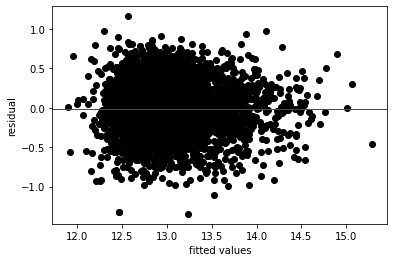

In [728]:
#Residual Plot
import matplotlib.pyplot as plt

plt.scatter(Lasso_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#This does not look too bad: our residuals are somehow centered around 
#a mean that is very close to 0 though there are outliers but there are no obvious patterns
#Since there is no major difference between multiple and ridge models,the residual plot is almost exact same

#Barlett's test for heteroscedasticity

In [729]:
#Heteroscedasticity test

import scipy as sp

test_result, p_value = sp.stats.bartlett(Lasso_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(Lasso_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

#There are no patterns in the variance of the data

inf
the variances are homogeneous!


#6.e) Elastic Net Regression

In [730]:
#Importing relevant libraries

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

In [731]:
# Data Preparation
# Setting up our X and y datasets
#

X = df[['bedrooms','bathrooms','sqft_living','sqft_lot','floors','waterfront','view','condition',
        'grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','year_adj']]
y = df['price']

In [732]:
# Dividing our data into training and test sets
# 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [733]:
# Elastic net, just like ridge and lasso regression, requires normalize data. 
# This argument  is set inside the ElasticNet function. 
# The second thing we need to do is create our grid.
# 
elastic=ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
search

GridSearchCV(cv=10, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=True,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=1,
             param_grid={'alpha': array([1.e-05, 1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02]),
                         'l1_ratio': [0.2, 0.4, 0.6, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [734]:
# We will now fit our model and display the best parameters and the best results we can get with that setup.
# 
search.fit(X,y)
print(search.best_params_)
abs(search.best_score_)

#The bset values fo ralpha and I1_ratio are shown below

{'alpha': 1e-05, 'l1_ratio': 0.8}


0.10895804356521732

In [735]:
# The best hyperparameters was an alpha set to 1 and a l1_ratio of 0.5. 
#Training the algorithm

Elastic_Reg= ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
Elastic_Reg.fit(X,y)


ElasticNet(alpha=1e-05, copy_X=True, fit_intercept=True, l1_ratio=0.8,
           max_iter=1000, normalize=True, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [736]:
#Checking the coefficients our regression model has chosen
# 
coeff_df = pd.DataFrame(Elastic_Reg.coef_, X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
bedrooms,-1.515176e-02
bathrooms,-0.000000e+00
sqft_living,1.254814e-01
sqft_lot,1.565599e-07
floors,6.308710e-02
waterfront,3.318782e-01
view,6.240184e-02
condition,9.225979e-02
grade,1.643942e-01
sqft_above,7.969519e-05


In [737]:
# Making Predictions
# 

Elastic_pred = Elastic_Reg.predict(X_test)
Elastic_pred

array([12.54635343, 12.92373024, 14.71773551, ..., 12.98670571,
       13.27737955, 12.81012731])

In [738]:
#Checking the model accuracy
#

Elastic_Reg.score(X_test, y_test)

#Our model has an accuraccy of 61.83% which is the same as compared to 

0.6182917714299162

In [739]:
# Evaluating the Algorithm
# 

from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(Elastic_pred, Lasso_pred))
print('Mean Squared Error:', metrics.mean_squared_error(Elastic_pred, Lasso_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(Elastic_pred, Lasso_pred)))

print('*****************')
print('Mean price:',df['price'].mean())


#Based on an RMSE of 0.0128 which is less than 10% of the mean price of houses thus the model 
#is quite good in performance 
#however it is the lowest as compared to tha of Multiple linear,ridge and lasso regression

Mean Absolute Error: 0.009920150365667912
Mean Squared Error: 0.00016384089364621378
Root Mean Squared Error: 0.012800034908007626
*****************
Mean price: 13.04789175384592


For the Elastic Net regression model,the model accuracy is 61.83% which shows a fair level of accuracy and the RMSE is 0.0128 which is less than 10% of the mean price of houses thus indicates the model created is fairly good.

When comparing with the multiple linear regression model and ridge and lasso regression model,there isn't a major difference in the accuracy levels and we notice a very slight difference in the accuracy with Elastic Net regression model showing a a slightly low level of accuracy compared to lasso,ridge and multiple linear regression.


# Residual and heteroscedasticity predictions by Elastic Net Regression

#Residual plot

In [740]:
# We now create the residual by substracting the test value from the predicted 
# value for each row in our dataset

residuals = np.subtract(Elastic_pred,y_test)

# Let's describe our residual:
pd.DataFrame(residuals).describe()

print(residuals)
print('********************')
residuals.mean()

#Our mean residual is close to 0 as shown below, indicating that our model tends to be appropriate

9791     0.261008
10281   -0.095492
19858   -0.091027
20058    0.022385
21203   -0.152809
           ...   
17762   -0.188400
13212   -0.026536
8109    -0.007824
19726   -0.487856
16123   -0.044357
Name: price, Length: 4322, dtype: float64
********************


-0.007007816507845362

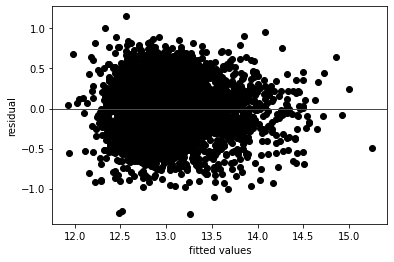

In [741]:
#Residual Plot
import matplotlib.pyplot as plt

plt.scatter(Elastic_pred, residuals, color='black')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y= residuals.mean(), color='red', linewidth=1)
plt.show()

#This does not look too bad: our residuals are somehow centered around 
#a mean that is very close to 0 though there are outliers but there are no obvious patterns
#Since there is no major difference between multiple,ridge model and lasso regressions,the residual plot is almost exact same

#Barlett's test for heteroscedasticity

In [742]:
#Heteroscedasticity test

import scipy as sp

test_result, p_value = sp.stats.bartlett(Elastic_pred, residuals)

# To interpret the results we must also compute a critical value of the chi squared distribution
degree_of_freedom = len(Lasso_pred)-1
probability = 1 - p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)
print(critical_value)

# If the test_result is greater than the critical value, then we reject our null
# hypothesis. This would mean that there are patterns to the variance of the data

# Otherwise, we can identify no patterns, and we accept the null hypothesis that 
# the variance is homogeneous across our data

if (test_result > critical_value):
  print('the variances are unequal, and the model should be reassessed')
else:
  print('the variances are homogeneous!')

#There are no patterns in the variance of the data

inf
the variances are homogeneous!


#Evaluation of model performance
In **general**, we see that the performance of all our models i.e lasso,ridge,Elastic and multiple linear regression is alomost the same in term sof accuracy and the best in accuracy is multiple linear regression and lowest is Elastic net regression though the difference is slight.


In terms of RMSE, Elastic Net regression model has the lowest with a significant difference from the RMSE of other regression models.Thus the overall best model is the Elastic Net regression with a good RMSE and an accuracy slightly same as other regressiom models.

#6. Challenging the solution

The reaserch was a success as we could be able to create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables.However the results could be improved if we had more features that could help us predict the results of a game.

Otherwise we can note the below:


1.The data we used for our research was appropriate to achieve the results.


2.The reaserch was a success as we were able to select the model taht best predicts sale of prices upon being provided with the predictor variables. 